### Solutions

##### Exercise 1.1 &ndash; Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows:

In [14]:
import pandas as pd

taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) collected via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

##### Exercise 1.2 &ndash; Find the dimensions (number of rows and number of columns) in the data:

In [15]:
taxis.shape

(10000, 18)

##### Exercise 1.3 &ndash; Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [33]:
import pandas as pd

taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


##### Exercise 1.4 &ndash; Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [34]:
taxis.loc[
    taxis.trip_distance.idxmax(), 
    ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

#### Exercise 2.1

In [11]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
meteorites = meteorites\
    .rename(columns={'mass (g)': 'mass'})\
    .drop(columns=meteorites.columns[-3:])\
    .sort_values('mass', ascending=False)
meteorites.head()

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM


#### Exercise 2.2

In [17]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv').assign(
    year=lambda x: pd.to_numeric(x.year.str.slice(6, 10)),
    pre_1970=lambda x: (x.fall == 'Fell') & (x.year < 1970)
).set_index('id')
meteorites.sort_index().loc[10_036:10_040]

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,pre_1970
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",False
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",False
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


**Note**: The `pd.to_datetime()` function is another option here; however, it will only be able to convert dates within the supported bounds (between `pd.Timestamp.min` and `pd.Timestamp.max`), which will cause some entries that do have a year to be marked as not having one. More information can be found in the pandas documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html). For reference, this is how the conversion can be done:

```python
pd.to_datetime(
    meteorites.year,
    errors='coerce',  # anything that can't be converted will be NaT (null)
    format='%m/%d/%Y %I:%M:%S %p'  # the format the datetimes are currently in
)
```

##### **Bonus**: There's a data entry error in the `year` column. Can you find it?

In [18]:
meteorites.year.describe()

count    45425.000000
mean      1991.828817
std         25.052766
min        860.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2101.000000
Name: year, dtype: float64

There's a meteorite that was reportedly found in the future:

In [19]:
meteorites.query(f'year > {pd.Timestamp("today").year}')

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,pre_1970
id,,,,,,,,,,
57150,Northwest Africa 7701,Valid,CK6,55.0,Found,2101.0,0.0,0.0,"(0.0, 0.0)",False


###### Oops! This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150)).

#### Exercise 2.3

In [37]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv').assign(
    year=lambda x: pd.to_numeric(x.year.str.slice(6, 10))
)
meteorites.query('year.between(2005, 2009)').pivot_table(
    index='year', columns='fall', values='mass (g)', 
    aggfunc=['count', lambda x: x.quantile(0.95)]
).rename(columns={'<lambda>': '95th percentile'})

count         95th percentile         
fall    Fell   Found            Fell    Found
year                                         
2005.0   NaN   874.0             NaN  4500.00
2006.0   5.0  2450.0         25008.0  1600.50
2007.0   8.0  1181.0         89675.0  1126.90
2008.0   9.0   948.0        106000.0  2274.80
2009.0   5.0  1492.0          8333.4  1397.25

#### Exercise 2.4

In [43]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')
meteorites.groupby('fall')['mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5

In [55]:
import pandas as pd

taxis = pd.read_csv(
    '../data/2019_Yellow_Taxi_Trip_Data.csv',
    parse_dates=True, index_col='tpep_dropoff_datetime'
)
taxis.resample('1H')[[
    'trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount'
]].sum().nlargest(5, 'tip_amount')

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


#### Exercise 3.1

We start by handling imports:

In [8]:
from matplotlib import ticker
import pandas as pd

Next, we write a function that will read in the data, use the `pivot()` method to reshape it, and then use the `plot()` method to generate the box plot:

In [9]:
def ex1():
    df = pd.read_csv('../data/tsa_melted_holiday_travel.csv')
    plot_data = df.pivot(columns='year', values='travelers')
    ax = plot_data.plot(kind='box')
    ax.set(xlabel='year', ylabel='travelers', title='TSA Traveler Throughput')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    return ax

Finally, we call our function:

<Axes: title={'center': 'TSA Traveler Throughput'}, xlabel='year', ylabel='travelers'>

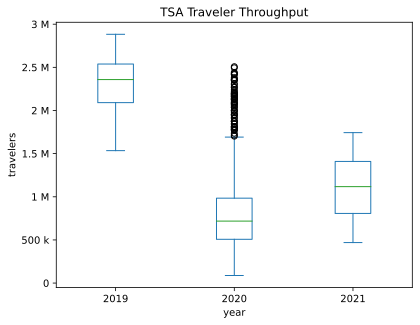

In [10]:
ex1()

#### Exercise 3.2

We start by reading in the data and handling imports:

In [14]:
import calendar

from matplotlib import ticker
import pandas as pd
import seaborn as sns

Next, we write a function that will read in the data, create a pivot table, and visualize it as a heatmap:

In [15]:
def ex2():
    df = pd.read_csv(
        '../data/tsa_melted_holiday_travel.csv',
        parse_dates=True, index_col='date'
    )
    plot_data = df.loc['2019'].assign(
        day_of_week=lambda x: x.index.dayofweek, month=lambda x: x.index.month
    ).pivot_table(
        index='day_of_week', columns='month', values='travelers', aggfunc='median'
    )

    ax = sns.heatmap(data=plot_data / 1e6, annot=True, fmt='.1f', cmap='Blues')
    ax.set_xticklabels(calendar.month_abbr[1:])
    ax.set_yticklabels(calendar.day_abbr, rotation=0)
    ax.set_title('2019 TSA Median Traveler Throughput\n(in millions)')

    return ax

Finally, we call our function:

<Axes: title={'center': '2019 TSA Median Traveler Throughput\n(in millions)'}, xlabel='month', ylabel='day_of_week'>

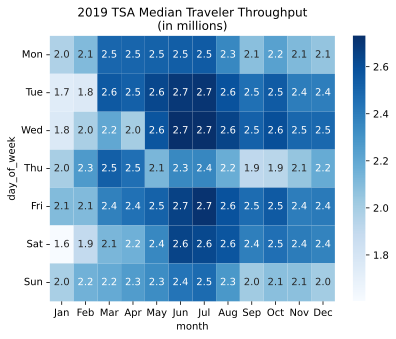

In [16]:
ex2()

#### Exercise 3.3

First, we modify the `return` statement from the solution to *Exercise 3.1* to also give us the data:

In [19]:
from matplotlib import ticker
import pandas as pd


def ex1():
    df = pd.read_csv('../data/tsa_melted_holiday_travel.csv')
    plot_data = df.pivot(columns='year', values='travelers')
    ax = plot_data.plot(kind='box')
    ax.set(xlabel='year', ylabel='travelers', title='TSA Traveler Throughput')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    return ax, plot_data

Now, we can build upon `ex1()` in a new function:

In [20]:
def ex3():
    ax, plot_data = ex1()

    # add annotations
    medians = plot_data.median()
    for tick_label in ax.get_xticklabels():
        median = medians[int(tick_label.get_text())]
        ax.annotate(
            f'{median / 1e6:.1f} M', 
            xy=(tick_label.get_position()[0], median), 
            ha='center', va='bottom'
        )
    
    return ax

Calling our function returns an annotated version of the plot from *Exercise 3.1*:

<Axes: title={'center': 'TSA Traveler Throughput'}, xlabel='year', ylabel='travelers'>

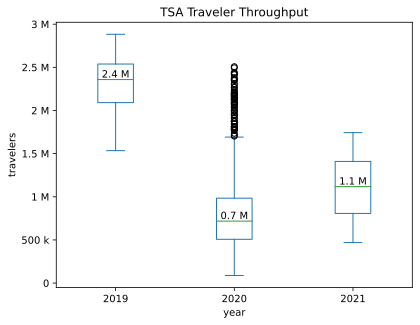

In [21]:
ex3()